DSCI100 Final Project - Group 22

# Can Age and Experience Level Predict Hours Played in the Players Dataset?

By Vanessa Mah 76858182, Jeya Cheema 68791771, Xiaowen Hu 77277085 & Amy Huang 45064565


## (1) Introduction 

At the University of British Columbia, a Computer Science research group led by Dr. Frank Wood is studying how people play video games in realistic environments. To support this research, the team developed a custom Minecraft server called PLAICraft, which automatically records players' actions as they move through the virtual environment. These data allow researchers to study behaviour patterns, decision making, and skill development.

However, running this type of data collection project requires careful planning. Server performance, data storage capacity, and software infrastructure all come with financial costs and depend heavily on how many people join the server and how long they play. To manage resources responsibly, the research group needs to understand which kinds of players tend to contribute the most data so they can focus their recruitment efforts on those groups. This leads to the central question of the project: **Can age and experience predict hours played in the Players dataset?**

The dataset used to answer this question is the `players` dataset, which provides insights into a group of players, including their experience level, subscription status, hours played, name, gender, and age. A summary of the variables is shown below.

### Dataset Overview

The `players` dataset contains 196 observations and 7 variables. 

#### Variable Information

| Variable     | Type      | Example Values                   | Meaning                                      |
|--------------|-----------|----------------------------------|----------------------------------------------|
| `experience`   | Character | Amateur, Pro | Player’s skill or experience level           |
| `subscribe`    | Logical   | TRUE / FALSE                    | Whether player has an active subscription    |
| `hashedEmail`  | Character | f8fda41...                     | Unique anonymized player identifier          |
| `played_hours` | Numeric   | 0.0, 30.3, 48.4                 | Total hours played                           |
| `name`         | Character | Morgan, Christian                   | Player’s given name                          |
| `gender`       | Character | Male, Female, Non-binary | Player’s self-reported gender                |
| `Age`          | Numeric   | 9, 21, 58                      | Age of the player in years                                 |

There are a few issues in the dataset that need to be addressed for more accurate analysis. In this case, we focus on three main problems:

- **Missing values**: The `Age` variable contains missing values for one player. There is also a possibility that other variables may contain missing values that are not visible.
- **Outliers**: The `played_hours` variable has extreme values (eg. 48.4 hours for one player), while many others report very low playtime. These outliers could skew summary statistics, especially the mean.
- **Misclassification of variables**: The `experience` variable should be converted to a factor because it represents categorical data, but it is currently stored as a character.
  
#### How the Data Were Collected
The dataset was collected from the PLAIcraft server through both self-reported information and automated tracking.

**Player-Provided Information:**
- `experience`, `name`, `gender`, and `Age`: Provided by players during account creation or profile updates.
- `hashedEmail`: Player email address collected during account registration, then anonymized for privacy.
- `subscribe`: Collected based on the player's selection of an active subscription during account creation or afterward.

**Automated Tracking:**
- `played_hours`: Automatically tracked by the server based on in-game activity.



To answer our specific question, we will only use the `Age`, `experience`, and `played_hours` variables from the dataset to predict player engagement.

## (2) Methods & Results 

In [1]:
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100-group-project/refs/heads/main/players.csv"

players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
players <- players |>
  mutate(experience = as.factor(experience))
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [9]:
players_clean <- players |>
  filter(!is.na(Age)) |>
  mutate(experience = factor(experience))
head(players_clean)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Before analysis, a few formatting steps were required:  
	•	Converted experience into a factor so R treats it as a categorical variable.  
	•	Checked for missing values in Age and played_hours. Only one missing value in age was found, so we removed that row for analyses involving age.  
	•	Verified that played_hours contained no impossible values other than some extreme outliers, which we kept because they may reflect true heavy-play behaviour.  

In [5]:
summary(players_clean$played_hours)
players_clean |>
  group_by(experience) |>
  summarize(
    mean_hours = mean(played_hours),
    sd_hours = sd(played_hours),
    n = n()
  )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.100   5.905   0.600 223.100 

experience,mean_hours,sd_hours,n
<fct>,<dbl>,<dbl>,<int>
Amateur,6.0174603,21.987214,63
Beginner,1.2485714,4.105547,35
Pro,2.7846154,8.283905,13
Regular,18.7257143,58.719074,35
Veteran,0.6479167,1.937424,48


Result summary (described in words): 
- Regular players appear to have the highest average played hours
- Amateur players have the second highest average played hours
- Pro and Veteran players contribute fewer hours than expected  
- There is substantial variability within each group

These patterns suggest experience may be somewhat related to total hours, but not perfectly.


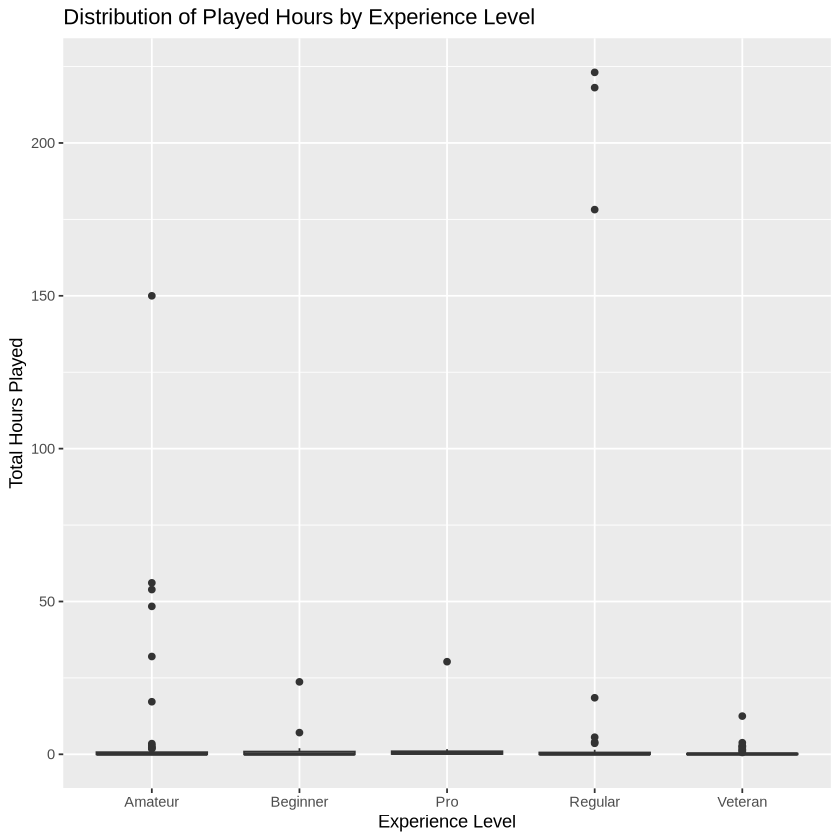

In [6]:
ggplot(players_clean, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(y = "Total Hours Played",
       x = "Experience Level",
       title = "Distribution of Played Hours by Experience Level")

The boxplot shows that Regular and Amateur players tend to play more hours on average than Veteran or Pro players. The distribution also contains a few extreme high-play outliers.

In [7]:
# Exploratory Data Analysis
# Summary Statistics
cat("\n=== SUMMARY STATISTICS ===\n\n")

# summary statistics for numeric variables
cat("\n--- Numeric Variables Summary Table ---\n\n")

# calculate statistics for played_hours and age and create a summary table
summary_table <- data.frame(
    Variable = c("played_hours", "Age"),
    Mean = c(round(mean(players$played_hours, na.rm = TRUE),2),
             round(mean(players$Age, na.rm = TRUE),2)),
    Median = c(round(median(players$played_hours, na.rm = TRUE),2),
               round(median(players$Age, na.rm = TRUE),2)),
    SD = c(round(sd(players$played_hours, na.rm = TRUE),2),
           round(sd(players$Age, na.rm = TRUE),2)),
    Min = c(round(min(players$played_hours, na.rm = TRUE),2),
            round(min(players$Age, na.rm = TRUE),2)),
    Max = c(round(max(players$played_hours, na.rm = TRUE),2),
            round(max(players$Age, na.rm = TRUE),2)),
    Missing_values = c(sum(is.na(players$played_hours)),
                       sum(is.na(players$Age))))
print(summary_table)
cat("\n")

# summary for categorical variables
cat("\n--- Categorical Variables Summary ---\n\n")

# experience levels
cat("Experience Distribution:\n")
experience_table <- as.data.frame(table(players$experience))
colnames(experience_table) <- c("Experience Level", "Count")
print(experience_table)
cat("\n")



=== SUMMARY STATISTICS ===


--- Numeric Variables Summary Table ---

      Variable  Mean Median    SD Min   Max Missing_values
1 played_hours  5.85    0.1 28.36   0 223.1              0
2          Age 21.14   19.0  7.39   9  58.0              2


--- Categorical Variables Summary ---

Experience Distribution:
  Experience Level Count
1          Amateur    63
2         Beginner    35
3              Pro    14
4          Regular    36
5          Veteran    48



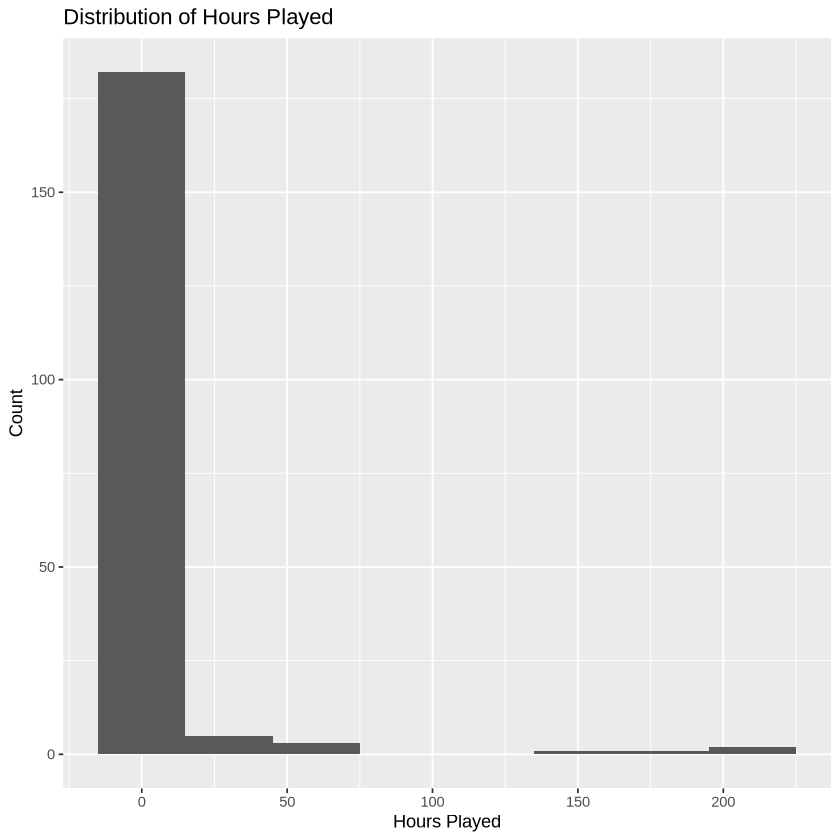

In [8]:
# Distribution of hours played
ggplot(players_clean, aes(x=played_hours))+
geom_histogram(binwidth=30)+
labs(x="Hours Played",
     y="Count",
     title="Distribution of Hours Played")